### Importamos librerias

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Extraemos el df, train test y normalizacion

In [2]:
dt_heart = pd.read_csv('data/heart.csv')


In [3]:
# Imprimimos un encabezado con los primeros 5 registros
print(dt_heart.head(5))
 
# Guardamos nuestro dataset sin la columna de target
dt_features = dt_heart.drop(['target'], axis=1)
# Este será nuestro dataset, pero sin la columna
dt_target = dt_heart['target']
 
# Normalizamos los datos
dt_features = StandardScaler().fit_transform(dt_features)
# print(dt_features)
  
# Partimos el conjunto de entrenamiento. Para añadir replicabilidad usamos el random state
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(717, 13)
(717,)


### Implementación del algoritmo PCA e IPCA

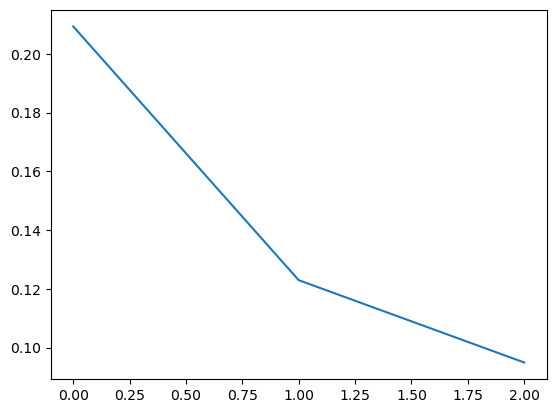

In [12]:
#  n_components =  min(n_muestras, n_features)
pca = PCA(n_components=3)
pca.fit(X_train)


ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_) 
plt.show()

In [9]:
logistic = LogisticRegression(solver='lbfgs')

dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train,y_train)
print('SCORE PCA: ', logistic.score(dt_test, y_test))

dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train,y_train)
print('SCORE IPCA: ', logistic.score(dt_test, y_test))

SCORE PCA:  0.8181818181818182
SCORE IPCA:  0.8051948051948052
